# IMDB Movies Sentiment Analysis Using DNN

### Imports :

In [12]:
import os 
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [43]:
from keras import models, layers

In [28]:
import numpy as np

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preprocessing :

In [14]:
labels = []
texts = []
label_types = ["neg","pos"]

#### Label Encoding:
- positive: 1
- negative: 0

In [15]:
# directories
data_dir = "./aclImdb/"
train_dir = os.path.join(data_dir,"train")

In [17]:
for label_type in label_types:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == ".txt":
            my_file = open(os.path.join(dir_name,fname))
            texts.append(my_file.read())
            my_file.close()
            if label_type == "pos":
                labels.append(1)
            else:
                labels.append(0)
print("done..")

done..


### Tokenization:

In [51]:
maxlen = 100
training_samples = 6250
validation_samples = 6250
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [52]:
word_index = tokenizer.word_index
print("Unique tokens count:",len(word_index))

Unique tokens count: 87446


In [53]:
data = pad_sequences(sequences=sequences, maxlen=maxlen)
labels = np.asarray(labels)

In [54]:
print("Shape of data tensor:", data.shape)
print("Shape of label tensor", labels.shape)

Shape of data tensor: (24275, 100)
Shape of label tensor (24275,)


In [55]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
indices

array([ 8361, 17988, 16716, ..., 19277,  9846,  4862])

In [56]:
#shuffling to break the order of negative followed by positive
data = data[indices]

In [57]:
labels = labels[indices]

In [58]:
#splitting data
x_train = data[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_train = labels[:training_samples]
y_val = labels[training_samples:training_samples+validation_samples]

### Model Defination:

In [45]:
model = models.Sequential()
embedding_dim = 100
#mode layers
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Flatten()) 
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### Training the model :

In [47]:
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=['acc'])

In [59]:
history = model.fit(x_train,y_train, epochs=10, batch_size=32, validation_data=(x_val,y_val))

Epoch 1/10
196/196 [==============================] - 9s 46ms/step - loss: 0.7580 - acc: 0.5002 - val_loss: 0.7372 - val_acc: 0.5082
Epoch 2/10
196/196 [==============================] - 11s 56ms/step - loss: 0.3088 - acc: 0.9342 - val_loss: 0.9204 - val_acc: 0.5094
Epoch 3/10
196/196 [==============================] - 11s 58ms/step - loss: 0.0386 - acc: 0.9939 - val_loss: 1.2240 - val_acc: 0.5021
Epoch 4/10
196/196 [==============================] - 11s 57ms/step - loss: 0.0061 - acc: 0.9992 - val_loss: 1.5103 - val_acc: 0.5067
Epoch 5/10
196/196 [==============================] - 11s 56ms/step - loss: 0.0025 - acc: 0.9994 - val_loss: 1.9027 - val_acc: 0.5038
Epoch 6/10
196/196 [==============================] - 12s 59ms/step - loss: 7.9922e-04 - acc: 0.9994 - val_loss: 2.1734 - val_acc: 0.5005
Epoch 7/10
196/196 [==============================] - 12s 60ms/step - loss: 6.6673e-04 - acc: 0.9995 - val_loss: 2.2971 - val_acc: 0.5022
Epoch 8/10
196/196 [==============================] - 1

### Results plotting:

In [37]:
# results plotting function
def plot_results(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

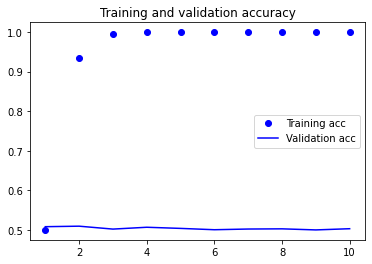

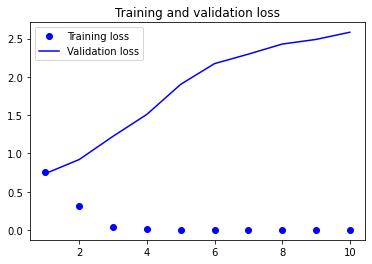

In [60]:
plot_results(history)

### Results:

- The neural net overfitts so quickly due to the small size of the data